<a href="https://colab.research.google.com/github/Farshad127/Machine-Vision/blob/main/Tensorflow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Function for reading the batch files
def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as file:
        batch = pickle.load(file, encoding='bytes')
    return batch

In [ ]:
# Specify the paths to the CIFAR-10 dataset batches
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_1',
    '/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_2',
    '/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_3',
    '/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_4',
    '/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_5'
]


# Load and concatenate the CIFAR-10 batches
images = []
labels = []

for file_path in file_paths:
    cifar_batch = load_cifar10_batch(file_path)
    images.append(cifar_batch[b'data'])
    labels.extend(cifar_batch[b'labels'])


# Concatenate the batches into a single training dataset
x_train = np.concatenate(images, axis=0)
y_train = np.array(labels)

print(np.shape(x_train))
print(np.shape(y_train))
x_train

(50000, 3072)
(50000,)


array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 35,  40,  42, ...,  77,  66,  50],
       [189, 186, 185, ..., 169, 171, 171],
       [229, 236, 234, ..., 173, 162, 161]], dtype=uint8)

In [ ]:
# Load the CIFAR-10 test_batch

test_cifar_batch = load_cifar10_batch('/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/test_batch')

test_images = []
test_labels =[]
test_images.append(test_cifar_batch[b'data'])
test_labels.extend(test_cifar_batch[b'labels'])

# Concatenate x_test

x_test = np.concatenate (test_images, axis=0)
y_test = test_labels

print(np.shape(x_test))
print(np.shape(y_test))
x_test


(10000, 3072)
(10000,)


array([[158, 159, 165, ..., 124, 129, 110],
       [235, 231, 232, ..., 178, 191, 199],
       [158, 158, 139, ...,   8,   3,   7],
       ...,
       [ 20,  19,  15, ...,  50,  53,  47],
       [ 25,  15,  23, ...,  80,  81,  80],
       [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8)

In [ ]:
# Reshape the input data
x_train = np.reshape(x_train, (-1, 32, 32, 3))
x_test = np.reshape(x_test, (-1, 32, 32, 3))


print('x_train')
print(np.shape(x_train))
print('-----------------------')
print('x_test_reshape')
#print(np.shape(x_train_reshape))

#x_test_reshape = np.reshape(x_test, (-1, 32, 32, 3))
print(np.shape(x_test))

x_train
(50000, 32, 32, 3)
-----------------------
x_test_reshape
(10000, 32, 32, 3)


In [ ]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)




In [ ]:
#Just for testing the Hot Encoding function for my data
#y_train_hot = keras.utils.to_categorical(y_train, num_classes=10)
#print(y_train_hot)
#print(y_train)
#print(np.shape(y_train))
#print(np.shape(y_train_hot))

In [ ]:
# Using Pandas library for better understanding the matrix

#df = pd.DataFrame(y_train)
#df
#np.shape(y_train)

(30000, 10)

In [ ]:
# Define and Compile CNN Model Architecture: using the TensorFlow or Keras API
# CNN model with a convolutional layer, pooling layer, flatten layer, and two fully connected (dense) layers.

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the CNN model using the CIFAR-10 training dataset
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 66s 41ms/step - loss: 1.5632 - accuracy: 0.4436 - val_loss: 1.4176 - val_accuracy: 0.4891
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2679 - accuracy: 0.5584 - val_loss: 1.2332 - val_accuracy: 0.5681
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1647 - accuracy: 0.5984 - val_loss: 1.1984 - val_accuracy: 0.5853
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0976 - accuracy: 0.6216 - val_loss: 1.1640 - val_accuracy: 0.5970
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0476 - accuracy: 0.6402 - val_loss: 1.1307 - val_accuracy: 0.6037
Epoch 6/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9955 - accuracy: 0.6567 - val_loss: 1.1758 - val_accuracy: 0.5967
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9532 - accuracy: 0.6701 - val_loss: 1.1353 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


313/313 [==============================] - 3s 9ms/step - loss: 1.1505 - accuracy: 0.6188
Test Loss: 1.1505303382873535
Test Accuracy: 0.6187999844551086


In [42]:
# Define a dictionary to map the numeric labels to their corresponding class names
class_names = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}
num_samples = 5
random_indices = np.random.choice(len(x_train), num_samples)

label = y_train[random_indices[3]]
print(label)

class_label = np.argmax(label)
class_label


class_names[class_label]

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


'deer'

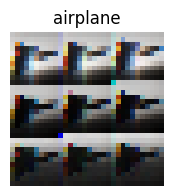

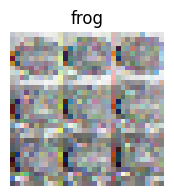

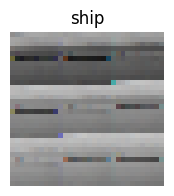

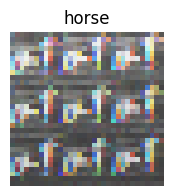

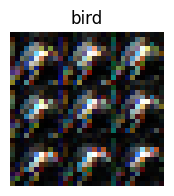

In [48]:

# Define a dictionary to map the numeric labels to their corresponding class names
class_names = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

# Select a random sample of images to display
num_samples = 5
random_indices = np.random.choice(len(x_train), num_samples)

# Display the images and their corresponding labels
for i in range(num_samples):
    image = x_train[random_indices[i]]
    label = y_train[random_indices[i]]

    # Convert the one-hot encoded label to a numeric class label
    class_label = np.argmax(label)

    # Plot the image
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.axis('off')

    # Set the title as the corresponding class name
    plt.title(class_names[class_label])

    # Show the plot
    plt.show()
